<a href="https://colab.research.google.com/github/cvillanue/DeepLearning-IdiomaticExpression/blob/main/IdiomaticExpression_BERT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning Based Idiomatic Expression Recognition using BERT**

## Project developed by: Callyn Villanueva 

Article + peer-reviewed sources used to : Rani Horev, Rob Toews.
[A New Approach for Idiom Identification Using Meanings and the Web](https://aclanthology.org/R15-1087) (Verma & Vuppuluri, RANLP 2015)

About the EPIE Corpus Dataset: 
https://arxiv.org/abs/2006.09479 

This dataset contains possible idiomatic expressions instances from 717 idioms divided into two folders:

    Formal Idioms - Idioms which undergo lexical changes.

    Static Idioms - Idioms which stay the same across instances.

Each folder contains 3 sentence aligned files with '*' replaced with either 'Static_Idioms' or 'Formal_Idioms'
*_Words.txt :- Original Sentences
*_Candidates.txt :- Candidate Idiom whose instance is present in the corresponding sentence.
*_Tags.txt :- Sequence labelling tags for each token of the sentence. Each entry delimited by space is treated as a separate token. The labelling follows BIO convention using three tags (B-IDIOM,I-IDIOM,O).

    B-IDIOM:- beginning of possible idiomatic expression span
    I-IDIOM:- continuation of possible idiomatic expression span
    O:- Non-Idiom token

For this project, I will be using BERT (Bidirectional Encoder Representations from Transformers) and will test Static Idioms. The model is designed to output binary classification, where each instance can be classified into one of two possible classes. In the case of idiom recognition, the model is trained to classify each instance as either an idiom or not an idiom.

## Introduction: 
Language enables us to reason abstractly, to develop complex ideas about what the world is and could be, and to build on these ideas across generations and geographies. Almost nothing about modern civilization would be possible without language. One form of language we use is called **Idiomatic Expressions.** They are used to communicate or convey a feeling or emotion.  


Building machines that can understand this form of language has been a complex problem, particulary with the usage and understanding of it. 


So, what are idioms? They’re a type of figurative language. You can’t rely on the words in an idiom to tell you what the phrase means. That’s because they have a meaning that is different from the literal meanings of the individual words themselves. Let’s look at an example. When someone says *it’s raining cats and dogs*, they don’t mean that there are actual animals falling from the sky. It’s an idiom! The phrase means that it’s raining very heavily.


Additionally, some idioms are context dependent. Example:

*The fisherman broke the ice with his tool.*
are we to believe that this is a very suave fisherman?

Another question arises, **is it is possible to teach an AI to use idiomatic phrases to keep up with the culture of humans?**

Observe that humans do not come linguistically "pre-loaded" with idioms. So we can safely assume that idiom usage is a learning task and that the only way for them to keep up is for them to keep learning. So if we solve the idiom learning task we just need to keep our agent online or periodically retrain it on nascent corpora. 



**About BERT:**

BERT makes use of Transformer, an attention mechanism that learns contextual relations between words (or sub-words) in a text. In its vanilla form, Transformer includes two separate mechanisms — an encoder that reads the text input and a decoder that produces a prediction for the task. Since BERT’s goal is to generate a language model, only the encoder mechanism is necessary.


**Masked LM (MLM)**

Before feeding word sequences into BERT, 15% of the words in each sequence are replaced with a [MASK] token. The model then attempts to predict the original value of the masked words, based on the context provided by the other, non-masked, words in the sequence. In technical terms, the prediction of the output words requires:

    Adding a classification layer on top of the encoder output.
    Multiplying the output vectors by the embedding matrix, transforming them into the vocabulary dimension.
    Calculating the probability of each word in the vocabulary with softmax.



Generalized Steps to train Corpus Data using BERT:

1. You will need to install the transformers library in Python, which provides a high-level interface for working with pre-trained transformer models such as BERT. You can install the library using pip by running the command pip install transformers.

2. Load and Tokenize the Corpus Data: You need to load and tokenize the corpus data using the BertTokenizer class from the transformers library. This class tokenizes the text and maps the tokens to their corresponding IDs for use with BERT.

3. Preprocess the Corpus Data: 
 Load the data from the three files (*_Words.txt, *_Candidates.txt, and *_Tags.txt) and split the sentences into individual words/tokens.
For each sentence, create a list of candidate idioms and their corresponding tags.
Convert the list of candidate idioms and tags for each sentence into a feature vector that can be fed into the BERT model. This could involve using the BERT tokenizer to convert the tokens into BERT input IDs, segment IDs, and attention masks, and then creating a separate label vector for each candidate idiom indicating whether it is an idiom or not.

 
4. Load the BERT Model: You can load a pre-trained BERT model from the transformers library using the BertForSequenceClassification class. This class provides a BERT model that has been pre-trained on a large corpus of text and can be fine-tuned for specific NLP tasks.

5. Fine-tune the BERT Model: You can fine-tune the BERT model on your corpus data using a technique called transfer learning. This involves training the model on your corpus data for a specific NLP task such as sentiment analysis, text classification, or question-answering.

6. Evaluate the BERT Model: After fine-tuning the model, you can evaluate its performance on a test dataset to measure its accuracy and other metrics.

In [1]:
!pip install bert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

In [4]:
# Loading the tokenizer and pre-trained BERT model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [44]:
!unzip Formal_Idioms_Corpus.zip

Archive:  Formal_Idioms_Corpus.zip
replace __MACOSX/._Formal_Idioms_Corpus? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: __MACOSX/._Formal_Idioms_Corpus  
replace Formal_Idioms_Corpus/Formal_Idioms_Candidates.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace __MACOSX/Formal_Idioms_Corpus/._Formal_Idioms_Candidates.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace Formal_Idioms_Corpus/Formal_Idioms_Tags.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace __MACOSX/Formal_Idioms_Corpus/._Formal_Idioms_Tags.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace Formal_Idioms_Corpus/Formal_Idioms_Words.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace __MACOSX/Formal_Idioms_Corpus/._Formal_Idioms_Words.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace Formal_Idioms_Corpus/Formal_Idioms_Labels.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace __MACOSX/Formal_Idioms_Corpus/._Formal_Idioms_Labels.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: no


In [5]:
import os

corpus_path = "Formal_Idioms_Corpus/"

# create a list of file paths for all *_Words.txt files in the corpus
corpus_files = [os.path.join(corpus_path, f) for f in os.listdir(corpus_path) if f.endswith("_Words.txt")]

# Create list of sentences and corresponding candidate idioms/tags
sentences = []
candidate_idioms = []
tags = []

# Iterate through each file and load data
for words_path in corpus_files:
    candidates_path = words_path.replace("_Words.txt", "_Candidates.txt")
    tags_path = words_path.replace("_Words.txt", "_Tags.txt")
    
    with open(words_path, 'r') as words_file, \
         open(candidates_path, 'r') as candidates_file, \
         open(tags_path, 'r') as tags_file:
        
        words_lines = words_file.readlines()
        candidates_lines = candidates_file.readlines()
        tags_lines = tags_file.readlines()
        
        for words_line, candidates_line, tags_line in zip(words_lines, candidates_lines, tags_lines):
            words = words_line.strip().split()
            candidates = candidates_line.strip().split('\t')
            sentence_tags = tags_line.strip().split()

            sentence_candidates = []
            candidate_tags = []

            # Iterate through each word in the sentence and create candidate idioms and tags
            for i, tag in enumerate(sentence_tags):
                if tag == 'B-IDIOM':
                    # Start of a candidate idiom
                    candidate = words[i]
                    tag = 1  # 1 indicates idiom
                    j = i + 1
                    while j < len(sentence_tags) and sentence_tags[j] == 'I-IDIOM':
                        # Add additional words to candidate idiom
                        candidate += ' ' + words[j]
                        sentence_tags[j] = 'O'  # Mark words as not part of candidate idiom
                        j += 1
                    sentence_candidates.append(candidate)
                    candidate_tags.append(tag)
                elif tag == 'O':
                    # Not part of a candidate idiom
                    sentence_candidates.append(words[i])
                    candidate_tags.append(0)  # 0 indicates not idiom

            sentences.append(words)
            candidate_idioms.append(sentence_candidates)
            tags.append(candidate_tags)

print(type(tags))

<class 'list'>


In [6]:
# Convert candidate idioms and tags for each sentence into feature vectors
input_ids = []
attention_masks = []
token_type_ids = []
labels = []

for i, sentence_candidates in enumerate(candidate_idioms):
    for j, candidate in enumerate(sentence_candidates):
        encoded_dict = tokenizer.encode_plus(
                            candidate,
                            add_special_tokens = True,
                            max_length = 64,
                            pad_to_max_length = True,
                            return_attention_mask = True,
                            return_token_type_ids = True,
                            return_tensors = 'pt',
                       )

        # Convert tensor elements to int and append to respective lists
        input_ids.append(encoded_dict['input_ids'].squeeze().tolist())
        attention_masks.append(encoded_dict['attention_mask'].squeeze().tolist())
        token_type_ids.append(encoded_dict['token_type_ids'].squeeze().tolist())
        labels.append(int(tags[i][j]))


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [7]:
with open("Formal_Idioms_Corpus/Formal_Idioms_Labels.txt", "r") as f:
    labels_list = [int(label.strip()) for label in f]

print(labels_list)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [8]:
if all(isinstance(elem, int) for elem in token_type_ids):
    print("All elements are integers")
else:
    print("List contains non-integer elements") 

print(type(token_type_ids))

List contains non-integer elements
<class 'list'>


In [9]:
import torch
from torch.utils.data import TensorDataset, DataLoader, random_split

# Convert feature vectors and label vectors into PyTorch tensors
input_ids = torch.tensor(input_ids)
attention_masks = torch.tensor(attention_masks)
token_type_ids = torch.tensor(token_type_ids)
labels = torch.tensor(labels)

# Create TensorDataset
dataset = TensorDataset(input_ids, attention_masks, token_type_ids, labels)

# Define the fraction of data to be used for testing and validation
test_fraction = 0.1 #remaining 90% will be used for training and validation
validation_fraction = 0.2

# Calculate the number of samples in the test and validation sets
test_size = int(len(dataset) * test_fraction)
validation_size = int(len(dataset) * validation_fraction)

# Calculate the number of samples in the training set
train_size = len(dataset) - test_size - validation_size

# Use random_split to create the training, validation, and test datasets
train_dataset, validation_dataset, test_dataset = torch.utils.data.random_split(
    dataset, [train_size, validation_size, test_size])

# Create DataLoaders for the training, validation, and test datasets
batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [10]:
print(input_ids.shape)
print(attention_masks.shape)
print(labels.shape)

torch.Size([81289, 64])
torch.Size([81289, 64])
torch.Size([81289])


In [ ]:
!pip install pandas --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 36.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4


In [ ]:
!pip install --upgrade keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
from transformers import AdamW, BertForSequenceClassification

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

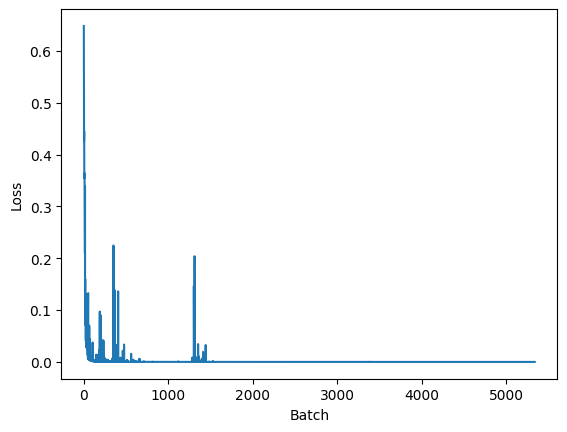

In [12]:

# Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Set optimizer and learning rate
optimizer = AdamW(model.parameters(), lr=2e-5)

# Train the model
epochs = 3
train_losses = []
for epoch in range(epochs):
    for batch in train_dataloader:
        # Load batch to GPU
        batch = tuple(t.to(device) for t in batch)

        # Unpack inputs and labels from batch
        input_ids, attention_mask, token_type_ids, labels = batch

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, labels=labels)

        # Compute loss
        loss = outputs.loss
        train_losses.append(loss.item())

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

        # Zero gradients
        optimizer.zero_grad()

import matplotlib.pyplot as plt
plt.plot(train_losses)
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.show()

In [13]:
from sklearn.metrics import accuracy_score
# Evaluate the model on the validation set
model.eval()
eval_accuracy = 0
eval_steps = 0
for batch in validation_dataloader:
    # Load batch to GPU
    batch = tuple(t.to(device) for t in batch)

    # Unpack inputs and labels from batch
    input_ids, attention_mask, token_type_ids, labels = batch

    # Disable gradient calculations
    with torch.no_grad():
        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)

        # Compute predictions
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        # Compute accuracy
        accuracy = accuracy_score(labels.cpu().numpy(), preds.cpu().numpy())
        eval_accuracy += accuracy
        eval_steps += 1

# Calculate average accuracy on validation set
eval_accuracy /= eval_steps
train_accuracy = 0
# Print training and validation accuracies for each epoch
print(f"Epoch {epoch+1}: Train loss: {loss.item():.3f} Train accuracy: {train_accuracy:.3f} Validation accuracy: {eval_accuracy:.3f}")

# Evaluate the model on the test set
test_accuracy = 0
test_steps = 0
for batch in test_dataloader:
    # Load batch to GPU
    batch = tuple(t.to(device) for t in batch)

    # Unpack inputs and labels from batch
    input_ids, attention_mask, token_type_ids, labels = batch

    # Disable gradient calculations
    with torch.no_grad():
        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)

        # Compute predictions
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        # Compute accuracy
        accuracy = accuracy_score(labels.cpu().numpy(), preds.cpu().numpy())
        test_accuracy += accuracy
        test_steps += 1

# Calculate average accuracy on test set
test_accuracy /= test_steps

# Print test accuracy
print(f"Test accuracy: {test_accuracy:.3f}")

Epoch 3: Train loss: 0.000 Train accuracy: 0.000 Validation accuracy: 1.000
Test accuracy: 1.000


In [22]:
import numpy as np
def process_input(input_text, max_seq_length=100):
    if isinstance(input_text, list):
        input_text = ' '.join(input_text)
    words = input_text.split()
    input_ids = np.zeros((1, max_seq_length), dtype=np.int32)
    for i, word in enumerate(words[:max_seq_length]):
        if word in tokenizer.vocab:
            input_ids[0][i] = tokenizer.vocab[word]

    return torch.tensor(input_ids).to(device)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

input_string = input('Enter a phrase: ')
input_tensor = process_input(input_string)
output_tensor = model(input_tensor)[0]

output = output_tensor.tolist()[0]
if output[0] > 0.5:
    print('Positive (Idiom)')
else:
    print('Negative (non-idiom)')

Enter a phrase: It's raining outside
Positive (Idiom)
